In [104]:
from inference_sdk import InferenceHTTPClient
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="K6PV1UeuN30UNJXyH7fB"
)
# result = CLIENT.infer(your_image.jpg, model_id="dmd-tfiw0/6")

In [29]:
# X = np.load('../data/data_aug_2000.npy').tolist()
# y = pd.read_csv('../data/labels_aug_2000.csv')
classes_test_og = pd.read_csv('../data/test/_classes.csv', delimiter=',', index_col=0).to_numpy()
filenames = pd.read_csv('../data/test/_classes.csv')["filename"]

0      gB_7_s5_2019-03-13T13-55-5201-00_ir_face_mp4-5...
1      gB_7_s5_2019-03-13T13-55-5201-00_ir_face_mp4-2...
2      gB_9_s2_2019-03-07T16-21-20-01-00_ir_face_mp4-...
3      gB_7_s2_2019-03-11T14-12-25-01-00_ir_face_mp4-...
4      gA_3_s2_ir_face_mp4-81_jpg.rf.041b0fb43257c0ba...
                             ...                        
980    gB_8_s2_2019-03-11T14-38-44-01-00_ir_face_mp4-...
981    gB_8_s2_2019-03-11T14-38-44-01-00_ir_face_mp4-...
982    gB_8_s1_2019-03-11T15-01-33-01-00_ir_face_mp4-...
983    gA_3_s2_ir_face_mp4-90_jpg.rf.ffbaf28fed0e0e99...
984    gA_1_s2_ir_face_mp4-349_jpg.rf.ff670261d6b77ca...
Name: filename, Length: 985, dtype: object


In [110]:
X_aug = np.load('../data/X_aug.npy')
y_aug = np.load('../data/y_aug.npy')
from sklearn.model_selection import train_test_split
X_aug_train_val, X_aug_test, y_aug_train_val, y_aug_test = train_test_split(X_aug, y_aug, test_size=0.07, random_state=42)
X_aug_train, X_aug_val, y_aug_train, y_aug_val = train_test_split(X_aug_train_val, y_aug_train_val, test_size=0.14, random_state=42)

j = 0
for i in X_aug_test:
    cv2.imwrite(f'../data/test_set_final/test{j}.jpg', i * 255)
    j+=1



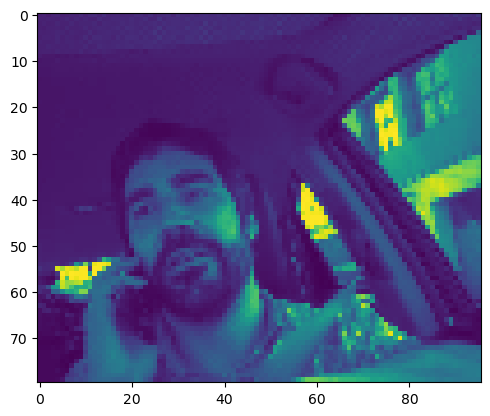

In [109]:
plt.imshow(X_aug_test[0])

In [120]:
# result = CLIENT.infer('/home/maxm/driver_inattention_detection/data/test/gA_1_s1_ir_face_mp4-89_jpg.rf.6d2ce17d7848ff67351b2419a702a087.jpg', model_id="dmd-tfiw0/6")
predictions = []
for i in filenames:
    result = CLIENT.infer(f'/home/maxm/driver_inattention_detection/data/test/{i}', model_id="dmd-tfiw0/6")
    predictions.append(result["predictions"])



In [113]:
j = 0
for i in predictions:
    print(i)
    print(classes_test_og[j])
    j += 1


[{'x': 27.5, 'y': 51.5, 'width': 55.0, 'height': 57.0, 'confidence': 0.795956015586853, 'class': 'DangerousDriving', 'class_id': 0, 'detection_id': 'b4826c17-ac5a-414b-9412-111153aaa55f'}]
[0 0 0 1 0 0]
[{'x': 77.0, 'y': 49.0, 'width': 30.0, 'height': 36.0, 'confidence': 0.5096051692962646, 'class': 'SafeDriving', 'class_id': 3, 'detection_id': '94b9b4a5-606d-41df-9bbf-46dd93ddef81'}, {'x': 73.5, 'y': 52.5, 'width': 45.0, 'height': 55.0, 'confidence': 0.40602266788482666, 'class': 'Drinking', 'class_id': 2, 'detection_id': 'd7e8aa7d-fd30-4fc6-97f3-a88b8daca497'}]
[0 0 0 0 0 1]
[]
[1 0 0 0 0 0]
[{'x': 52.5, 'y': 50.0, 'width': 81.0, 'height': 60.0, 'confidence': 0.5785576105117798, 'class': 'DangerousDriving', 'class_id': 0, 'detection_id': '7710853d-21e3-4f8f-938d-06c4564945c9'}]
[0 0 0 1 0 0]
[]
[1 0 0 0 0 0]
[{'x': 44.0, 'y': 52.0, 'width': 84.0, 'height': 56.0, 'confidence': 0.500964879989624, 'class': 'DangerousDriving', 'class_id': 0, 'detection_id': 'bb339b3a-5752-4258-b753-09820

In [114]:
# vec = [0, 0, 0, 0, 0, 0]
j = 0
k = 0
y_robo_pred = []
y_true_vec = []
for i in predictions:
    if i == []:
        y_robo_pred.append(7)
        y_true_vec.append(classes_test_og[j])
        j += 1
        k += 1
    else:
        y_robo_pred.append(i[0]['class_id'])
        y_true_vec.append(classes_test_og[j])
        j+=1
# print(j, len(predictions))

In [115]:
y_true = []
for i in range(len(y_true_vec)):
    k = np.where(y_true_vec[i] == 1)[0][0]
    y_true.append(k)
print(y_true)
print(y_robo_pred)

[3, 5, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 0, 4, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3, 4, 3, 3, 0, 3, 0, 3, 3, 0, 3, 5, 3, 0, 3, 3, 1, 1, 1, 0, 3, 0, 0, 1, 5, 3, 0, 3, 0, 1, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 3, 0, 3, 4, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 4, 3, 0, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 0, 4, 0, 1, 2, 0, 0, 3, 3, 3, 5, 3, 4, 0, 3, 3, 2, 2, 4, 1, 3, 0, 5, 3, 1, 0, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 0, 4, 1, 3, 3, 0, 4, 3, 1, 3, 0, 0, 3, 0, 0, 2, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 0, 3, 3, 0, 3, 0, 0, 4, 3, 3, 3, 3, 3, 0, 1, 0, 3, 1, 0, 3, 0, 3, 3, 3, 1, 0, 0, 0, 1, 4, 0, 5, 1, 0, 0, 0, 3, 1, 3, 1, 1, 1, 0, 0, 3, 3, 3, 3, 0, 3, 0, 4, 1, 3, 3, 0, 1, 3, 3, 0, 3, 4, 3, 0, 3, 3, 0, 1, 2, 0, 3, 1, 0, 3, 5, 0, 2, 0, 3, 4, 1, 3, 0, 3, 1, 3, 1, 3, 3, 3, 0, 1, 5, 0, 4, 1, 0, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3, 3, 0, 0, 3, 0, 0, 4, 0, 3, 0, 3, 1, 0, 3, 3, 1, 1, 0, 5, 1, 1, 0, 4, 0, 3, 3, 1, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 1, 5, 1, 3, 0, 3, 3, 

7


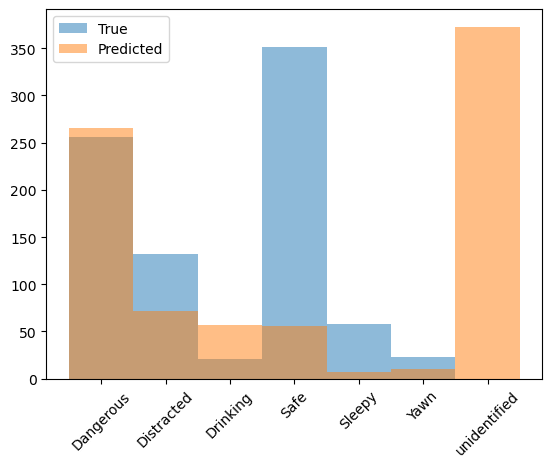

In [116]:

labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn', 'unidentified']
plt.hist(y_true, bins = [0, 1, 2, 3, 4, 5, 6], alpha=0.5, label='True')
num = plt.hist(y_robo_pred, bins=7, alpha=0.5, label='Predicted')
edges = num[1]
bin_centers = 0.5 * (edges[:-1] + edges[1:])
print(len(bin_centers))
plt.xticks(bin_centers, labels, rotation=45)
plt.legend(loc='upper left')
plt.show()

invalid value encountered in divide


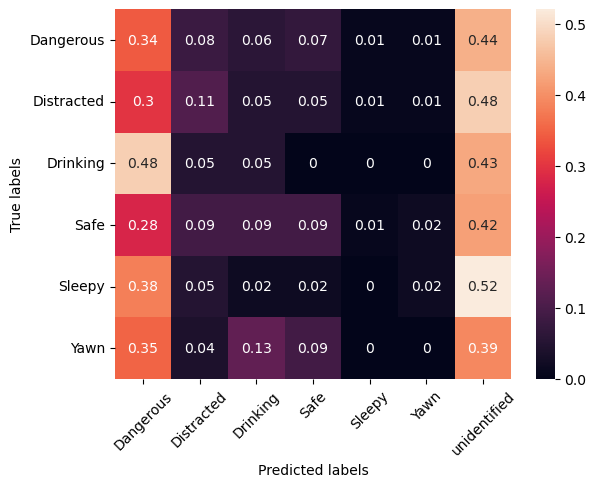

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn', 'unidentified']
cm = confusion_matrix(y_true, y_robo_pred)
#normalize each column
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#delete last row 
cm = np.delete(cm, 6, 0)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels[:6])
plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
plt.savefig('confusion_matrix_robo.png')

In [118]:
print(classification_report(y_true, y_robo_pred, target_names=labels))
crp = classification_report(y_true, y_robo_pred, output_dict=True, target_names=labels)
print(accuracy_score(y_true, y_robo_pred))
print(f1_score(y_true, y_robo_pred, average='weighted'))
print(precision_score(y_true, y_robo_pred, average='weighted'))
print(recall_score(y_true, y_robo_pred, average='weighted'))

              precision    recall  f1-score   support

   Dangerous       0.32      0.34      0.33       256
  Distracted       0.19      0.11      0.14       132
    Drinking       0.02      0.05      0.03        21
        Safe       0.54      0.09      0.15       351
      Sleepy       0.00      0.00      0.00        58
        Yawn       0.00      0.00      0.00        23
unidentified       0.00      0.00      0.00         0

    accuracy                           0.16       841
   macro avg       0.15      0.08      0.09       841
weighted avg       0.35      0.16      0.18       841

0.15576694411414982
0.18401078568753002
0.35295804910611844
0.15576694411414982


Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


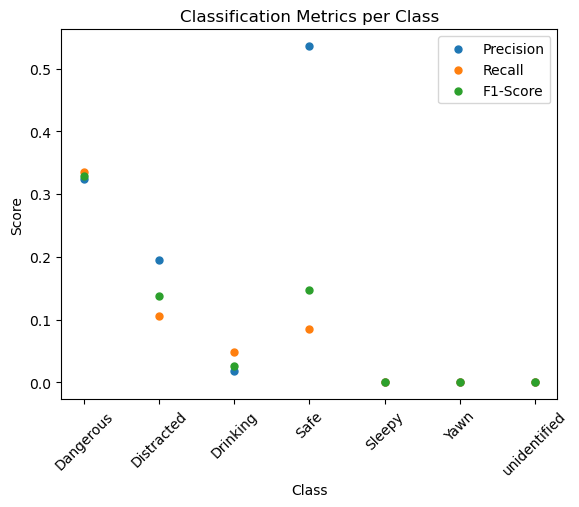

In [119]:

precision = [crp[label]['precision'] for label in labels]
recall = [crp[label]['recall'] for label in labels]
f1_score = [crp[label]['f1-score'] for label in labels]

# Plotting
plt.figure()
plt.scatter(labels, precision, label='Precision', marker = 'o', s = 25)
plt.scatter(labels, recall, label='Recall', marker = 'o', s = 25)
plt.scatter(labels, f1_score, label='F1-Score', marker = 'o', s = 25)
plt.legend()
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.title('Classification Metrics per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.show()